In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

data_raw_path = "../data-raw"
data_output_path = "../data-output"
cereal_filename = "cereal.csv"

In [2]:
cereal_filepath = data_raw_path + "/" + cereal_filename
cereal_raw = pd.read_csv(cereal_filepath)

In [3]:
cereal_raw.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
cereal_raw.shape

(77, 16)

In [5]:
# See if there are missing values 
assert cereal_raw.isna().any().sum() == 0
cereal_raw.isna().any()

name        False
mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo       False
sugars      False
potass      False
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool

Great! It looks like the dataset has no missing values.

In [10]:
cereal_raw.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [21]:
# Why are some carbo, sugars, potass < 0? 
# cereal_raw.query('carbo < 0 | sugars < 0 | potass < 0')

# cereal_raw[cereal_raw[["carbo", "sugars", "potass"]] < 0]

In [22]:
cereal_raw.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


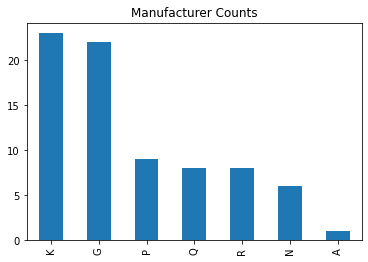

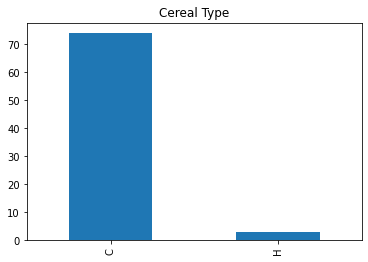

In [23]:
# Visualizations 
cereal_raw["mfr"].value_counts().plot(kind="bar")
plt.title("Manufacturer Counts")
plt.show()

cereal_raw["type"].value_counts().plot(kind="bar")
plt.title("Cereal Type");

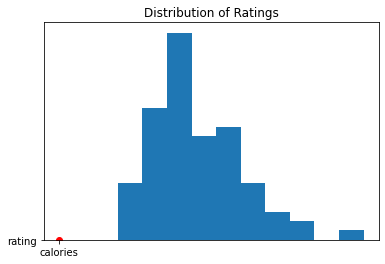

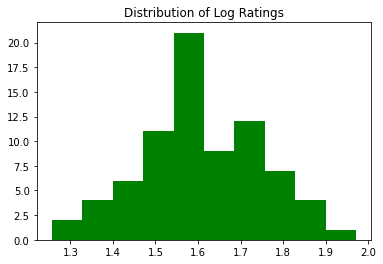

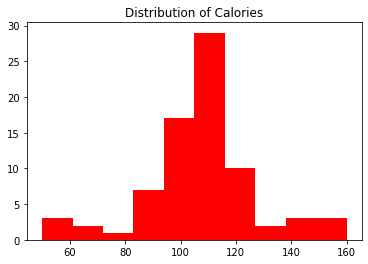

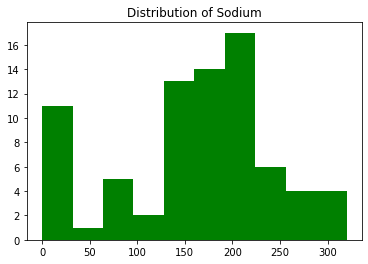

In [27]:
plt.scatter(
    x="calories", 
    y="rating", 
    data="cereal_raw",
    color="red"
);
cereal_raw["rating"].hist(grid=False)
plt.title("Distribution of Ratings");
plt.show()

np.log10(cereal_raw["rating"]).hist(grid=False, color="green")
plt.title("Distribution of Log Ratings");
plt.show()


cereal_raw["calories"].hist(grid=False, color="red")
plt.title("Distribution of Calories");
plt.show()

cereal_raw["sodium"].hist(grid=False, color="green")
plt.title("Distribution of Sodium");

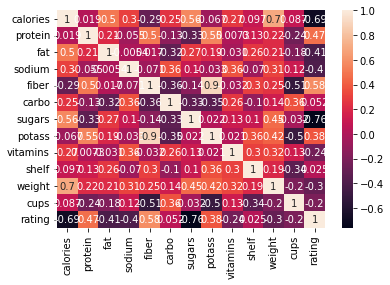

In [25]:
cereal_cor = cereal_raw.corr()
sns.heatmap(cereal_cor, annot=True);

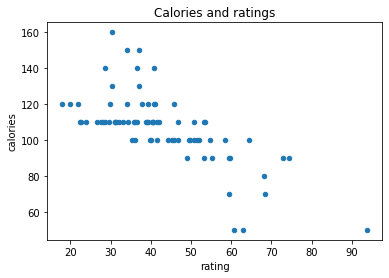

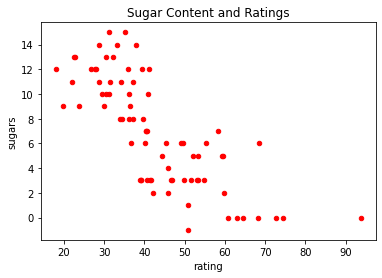

In [26]:
cereal_raw.plot("rating", "calories", kind="scatter")
plt.title("Calories and ratings")
plt.show();

cereal_raw.plot("rating", "sugars", kind="scatter", color="red")
plt.title("Sugar Content and Ratings")
plt.show()
# cereal_raw["rating_log"] = np.log10(cereal_raw["rating"])

In [28]:
X = cereal_raw.drop(["name", "rating", "cups"], axis=1)
y = cereal_raw["rating"].to_numpy()

In [32]:
X = pd.get_dummies(data=X, drop_first=True)

In [33]:
# create linear model


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0,0,1,0,0,0,0
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,0,0,0,0,1,0,0
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0,1,0,0,0,0,0
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0,1,0,0,0,0,0
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,1,0,0,0,0,0,0
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1,0,0,0,0,0,0
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0,0,0,0,0,1,0
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1,0,0,0,0,0,0


In [58]:
cereal_reg = linear_model.LinearRegression()
cereal_reg.fit(X, y)

LinearRegression()

In [59]:
cereal_reg.coef_

array([-2.22724166e-01,  3.27317388e+00, -1.69140797e+00, -5.44927022e-02,
        3.44347975e+00,  1.09245095e+00, -7.24895135e-01, -3.39933501e-02,
       -5.12119680e-02, -4.81515995e-08, -4.82933048e-07,  3.63247200e-07,
        3.64637350e-07,  4.51192242e-07,  5.80135667e-07,  2.85623621e-07,
        3.91479934e-07,  1.53568457e-07])

In [65]:
for x, c in zip(X.columns, cereal_reg.coef_):
    print(x + ": " + str(c))

calories: -0.22272416565167816
protein: 3.2731738766658296
fat: -1.6914079699818783
sodium: -0.05449270218221357
fiber: 3.4434797534044517
carbo: 1.0924509501831046
sugars: -0.7248951346230776
potass: -0.03399335012614742
vitamins: -0.051211968032612555
shelf: -4.8151599533897064e-08
weight: -4.829330480948972e-07
mfr_G: 3.6324719954381387e-07
mfr_K: 3.6463734982688297e-07
mfr_N: 4.5119224193461296e-07
mfr_P: 5.801356671064821e-07
mfr_Q: 2.8562362101674075e-07
mfr_R: 3.914799337660993e-07
type_H: 1.5356845666034818e-07


In [74]:
lr = sm.OLS(y, X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              516.7
Date:                Wed, 06 Oct 2021   Prob (F-statistic):                    5.07e-58
Time:                        19:21:54   Log-Likelihood:                         -207.12
No. Observations:                  77   AIC:                                      450.2
Df Residuals:                      59   BIC:                                      492.4
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
calories      -0.3666      0.085     -4.299      0.000      -0.537      -0.196
protein        4.5355      0.678      6.694      0.000       3.180       5.891
fat           -0.7337      0.971     -0.755      0.453      -2.677       1.210
sodium        -0.0668      0.008     -8.030      0.000      -0.083      -0.050
fiber          3.7149      0.741      5.012      0.000       2.232       5.198
carbo          2.2255      0.282      7.885      0.000       1.661       2.790
sugars         0.1046      0.282      0.371      0.712      -0.460       0.669
potass        -0.0318      0.022     -1.429      0.158      -0.076       0.013
vitamins      -0.0619      0.026     -2.370      0.021      -0.114      -0.010
shelf          0.2451      0.737      0.333      0.741      -1.229       1.719
weight         7.1070      7.773      0.914      0.364      -8.447      22.661
mfr_G         37.7640      3.920      9.634      0.000      29.920      45.608
mfr_K         36.5329      4.407      8.291      0.000      27.715      45.350
mfr_N         33.0032      4.388      7.521      0.000      24.222      41.784
mfr_P         37.2898      4.391      8.493      0.000      28.504      46.076
mfr_Q         39.6965      3.616     10.978      0.000      32.461      46.932
mfr_R         36.4730      4.312      8.459      0.000      27.845      45.101
type_H        17.3398      3.758      4.614      0.000       9.819      24.860
==============================================================================
Omnibus:                       28.038   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.447
Skew:                           0.329   Prob(JB):                     4.35e-75
Kurtosis:                      13.310   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
cereal_ridge = linear_model.Ridge(alpha=0.5)
cereal_ridge.fit(X, y)

Ridge(alpha=0.5)

In [80]:
cereal_ridge.coef_

array([-0.22400657,  3.22815244, -1.65804301, -0.05434521,  3.39108108,
        1.0860723 , -0.73460627, -0.03239697, -0.05087054, -0.00631486,
        0.07490963, -0.02829659,  0.05693449,  0.06661751,  0.03146764,
       -0.04472988,  0.0190171 ,  0.0084298 ])

In [81]:
for x, c in zip(X.columns, cereal_ridge.coef_):
    print(x + ": " + str(c))

calories: -0.22400656628626087
protein: 3.2281524407055775
fat: -1.6580430130838066
sodium: -0.054345213747636914
fiber: 3.3910810829435016
carbo: 1.0860722978349666
sugars: -0.7346062737632656
potass: -0.03239697385125882
vitamins: -0.05087054149176844
shelf: -0.006314864150183232
weight: 0.07490963364265484
mfr_G: -0.02829658847260627
mfr_K: 0.05693449034912328
mfr_N: 0.06661751258356255
mfr_P: 0.03146763806200063
mfr_Q: -0.04472988199980507
mfr_R: 0.01901709601236568
type_H: 0.008429799041916505


In [82]:
cereal_lasso = linear_model.Lasso(alpha=0.5)
cereal_lasso.fit(X, y)
cereal_lasso.coef_
for x, c in zip(X.columns, cereal_lasso.coef_):
    print(x + ": " + str(c))

calories: -0.24749168896027177
protein: 2.4421052865199564
fat: -0.9414563359558226
sodium: -0.05396946737959618
fiber: 2.854674661673651
carbo: 1.0961829399126188
sugars: -0.8074186001513165
potass: -0.011422486779768082
vitamins: -0.0454700200942957
shelf: -0.0
weight: 0.0
mfr_G: -0.0
mfr_K: 0.0
mfr_N: 0.0
mfr_P: 0.0
mfr_Q: -0.0
mfr_R: -0.0
type_H: 0.0
